In [1]:
#Test for RESNET-34
import matplotlib.pyplot as plt
import fastai
import cv2
from fastai.vision import *
%matplotlib inline
import torchvision
%matplotlib inline
import time

In [2]:
learn = load_learner("/Users/sandeep/Desktop/dataandmodles/models/actionClassification",file='stage2-resnet34-size244-50Epoch.pkl')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torchvision.models.resnet.BasicBlock' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [7]:
def getPredictionClass(frame):
    '''
        Given an classification for an image 
    '''
    classes = ['ball in hand','block','defense','dribble','no_action','pass',
               'pick','run','shoot','walk']
    resizedImg = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resizedImg = Image(pil2tensor(resizedImg, dtype=np.float32).div_(255))
    pred = learn.predict(resizedImg)
    pred = classes[pred[1].tolist()]
    return pred

def test():
    path = '/Volumes/My Passport/FinalYearProjectData/ActionClassification5/test'
    folder = os.listdir(path)
    gt_array, pred_array,time_array = [],[],[]
    np.random.seed(2)
    for f in folder:
        imageBasePath = path+'/'+f
        images = [i for i in os.listdir(imageBasePath) if i[0] != '.']
        images  = np.random.choice(images,426)
        gt = f 
        #counting
        total_images  = len(images)      
        for i,image in enumerate(images):
            if image[0] != '.':
                imagePath = imageBasePath +'/'+image
                img = cv2.imread(imagePath)
                #Get Prediction
                st = time.time()
                pred = getPredictionClass(img) 
                et = time.time()
                time_array.append(et-st)
                #Add prediction and gt to the arrays
                gt_array.append(gt)
                pred_array.append(pred)
                #Print progression 
                if (100*(i/total_images) % 10) == 0:
                    print(f'Folder {f} : {100*(i/total_images)} complete!')
    return pred_array,gt_array,time_array
    

In [8]:
pred,gt,time = test()


Folder ball in hand : 0.0 complete!
Folder ball in hand : 50.0 complete!
Folder block : 0.0 complete!
Folder block : 50.0 complete!
Folder defense : 0.0 complete!
Folder defense : 50.0 complete!
Folder dribble : 0.0 complete!
Folder dribble : 50.0 complete!
Folder no_action : 0.0 complete!
Folder no_action : 50.0 complete!
Folder pass : 0.0 complete!
Folder pass : 50.0 complete!
Folder pick : 0.0 complete!
Folder pick : 50.0 complete!
Folder run : 0.0 complete!
Folder run : 50.0 complete!
Folder shoot : 0.0 complete!
Folder shoot : 50.0 complete!
Folder walk : 0.0 complete!
Folder walk : 50.0 complete!


In [9]:
from sklearn import metrics

metrics.precision_recall_fscore_support(gt,pred,average='macro',labels=learn.data.classes)

/Users/sandeep/opt/anaconda3/envs/cv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.27113885537158045, 0.24014084507042255, 0.1867493346020636, None)

In [15]:
metrics.confusion_matrix(gt,pred,labels=learn.data.classes)

array([[ 64,  70,  48,  25, ...,   1,  23,   0,   3],
       [ 20, 221,  40,  15, ...,   0,   2,   0,   2],
       [ 14,  53, 225,  38, ...,   0,  12,   0,   4],
       [ 24,  63,  92,  72, ...,   0,  71,   0,   8],
       ...,
       [ 44,  65, 103,  18, ...,   7,  12,   0,   8],
       [ 24,  58,  37,  35, ...,   1, 165,   0,   6],
       [ 23, 187,  14,   7, ...,   0,   1,   0,   5],
       [ 12,  87,  68,  66, ...,   3,  33,   0,  21]])

In [11]:
np.mean(time)

0.1828644742988085

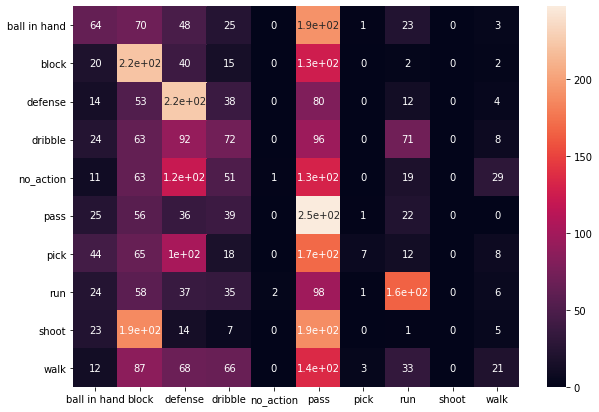

In [18]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = metrics.confusion_matrix(gt,pred,labels=learn.data.classes)
df_cm = pd.DataFrame(array, index = [i for i in learn.data.classes],
                  columns = [i for i in learn.data.classes])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)